In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import bls

In [2]:
cpi = bls.get_series('CUUR0000SA0')
cpi.to_csv("cpi_data.csv")
cpi_data = pd.read_csv('cpi_data.csv')
cpi_data.columns = 'Date','CPI'

In [3]:
print(cpi)

date
2014-01    233.916
2014-02    234.781
2014-03    236.293
2014-04    237.072
2014-05    237.900
            ...   
2023-04    303.363
2023-05    304.127
2023-06    305.109
2023-07    305.691
2023-08    307.026
Freq: M, Name: CUUR0000SA0, Length: 116, dtype: float64


<AxesSubplot:xlabel='date'>

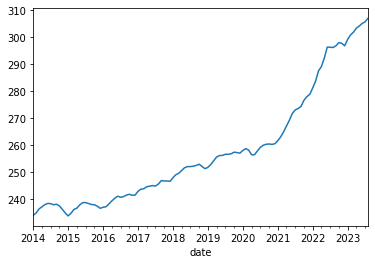

In [4]:
cpi.plot()

But now we want to fix the issue where the data do not use the same formating of the date. Here replace Q1 to 03, etc

In [5]:
cpi_data['Date'] = cpi_data['Date'].str.replace('-03', 'Q1')
cpi_data['Date'] = cpi_data['Date'].str.replace('-06', 'Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-09', 'Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-12', 'Q4')

<AxesSubplot:>

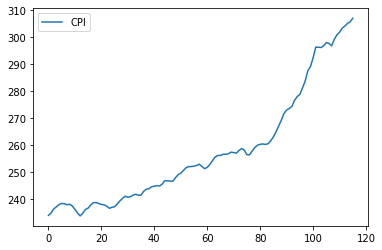

In [6]:
cpi_data.plot()

<AxesSubplot:>

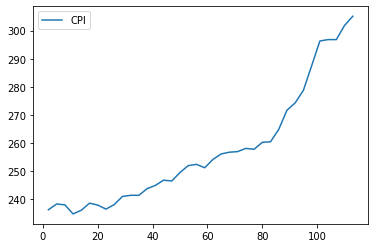

In [7]:
newcpi_data = cpi_data[(cpi_data.Date.str.contains("-") == False)]
newcpi_data.plot()

We only wanted a report of the data every quadrimester

In [8]:
newcpi_data.to_csv("cpi-clean.csv")

Now the last issue, is the fact that our CPI is in absolute values while our wages were in *percentile*

In [9]:
wages = bls.get_series('CIU2020000000000A')
wages.to_csv('bls_data.csv')
df = pd.read_csv('bls_data.csv')
df.columns = 'Date','Wages'

<AxesSubplot:>

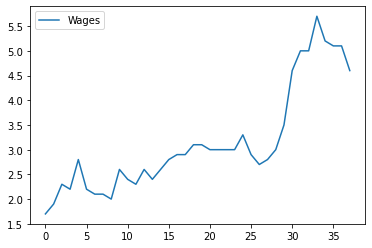

In [10]:
df.plot()

We need to be cautious with this quaterly growth. Here, we will  be dividing this growth by 4. So we assume that if our data shows a 2% growth for Q1 means that for the 3 months, it actually grew 0.5% each month.

We will first begin with our baseline being the CPI at the start of 2012. We will divide the wages by `400`. We will adjust our CPI thanks to the Wages adjustement.

In [11]:
newdf = df
newnum = 229.392
def process_wages(x):
    global newnum
    if type(x) is str:
        return x
    elif x:
        newnum = (x / 400) * newnum + newnum
        return newnum
    else:
        return
newwages = newdf.applymap(process_wages)

<AxesSubplot:>

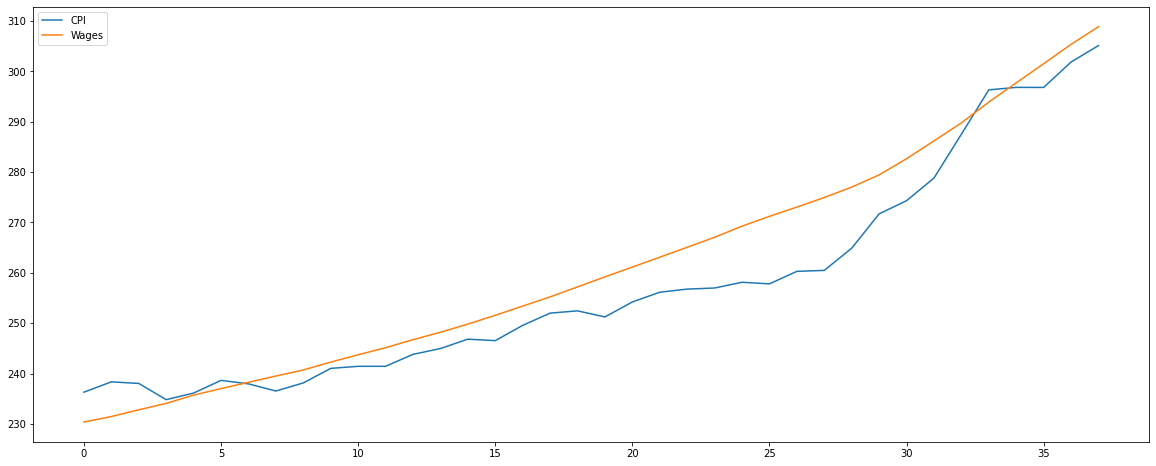

In [12]:
merged_data = pd.merge(newcpi_data, newwages, on='Date')
merged_data.plot(figsize=(20,8))